In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1) - в Podcast_Name есть названия, которые можно определить по категориям и типам, просто кодировать мало. Пропусков нет

2) - есть строки, в которых Episode_Length_minutes меньше Listening_Time_minutes, то есть человек слушал не один раз. Создать новую колонку с числом прослушивания.Нет, тх нужно дропать потмоук что одна из колонок это таргет. к тому же их 2.5к из 750к

3) + заменил tr[tr['Number_of_Ads'] > 12] на -1, странно большие значения числав рекламы. При этом их значение очень похоже на таргет. a = tr[tr['Number_of_Ads'] > 12]
    a['Number_of_Ads'] - a['Listening_Time_minutes']

4) - в Episode_Length_minutes есть нулевые и просто маленькие занчения

5) - Возможно потерял инфомрацию при кодировании жанра

6) - в Host_Popularity_percentage есть низкие значения типа 2.9 а потом сразу 20, резкий скачок. Есть значения больше 100

7) - Publication_Day циклическая фича, кодировал без учета этого

8) - Publication_Time циклическая фича, кодировал без учета этого

9) - Guest_Popularity_percentage мно8го пропусков, есть значения больше 100

10) - Один пропуск, много нулей и значений до 4, есть выбрасы до 102

11) - Episode_Sentiment закодировал одно из значений как -1, не хорошо, сбивает с толку

12) - Listening_Time_minutes таргет, но есть значение 119, такое же как выбрасы на процентах, это стртанно 

In [65]:
tr = pd.read_csv('data\\train.csv')
tst = pd.read_csv('data\\test.csv')

In [40]:
podcast_type_mapping = {
    # Новости и аналитика
    'News Roundup': 1,
    'Global News': 1,
    'World Watch': 1,
    'Current Affairs': 1,
    
    # Технологии и гаджеты
    'Tech Talks': 2,
    'Tech Trends': 2,
    'Gadget Geek': 2,
    'Digital Digest': 2,
    'Innovators': 2,
    
    # Спорт
    'Sports Central': 3,
    'Sports Weekly': 3,
    'Sport Spot': 3,
    'Game Day': 3,
    "Athlete's Arena": 3,
    
    # Юмор
    'Comedy Corner': 4,
    'Funny Folks': 4,
    'Humor Hub': 4,
    'Laugh Line': 4,
    'Joke Junction': 4,
    
    # Здоровье и образ жизни
    'Fitness First': 5,
    'Mind & Body': 5,
    'Wellness Wave': 5,
    'Healthy Living': 5,
    'Health Hour': 5,
    'Home & Living': 5,
    'Lifestyle Lounge': 5,
    
    # Бизнес и финансы
    'Business Briefs': 6,
    'Money Matters': 6,
    'Finance Focus': 6,
    'Market Masters': 6,
    'Business Insights': 6,
    
    # Музыка
    'Music Matters': 7,
    'Melody Mix': 7,
    'Sound Waves': 7,
    'Tune Time': 7,
    
    # Образование и наука
    'Study Sessions': 8,
    'Learning Lab': 8,
    'Educational Nuggets': 8,
    'Brain Boost': 8,
    'Life Lessons': 8,
    
    # Криминал и детективы
    'Criminal Minds': 9,
    'Crime Chronicles': 9,
    'Detective Diaries': 9,
    'True Crime Stories': 9,
    
    # Мода
    'Fashion Forward': 10,
    'Style Guide': 10,
    
    # Разное (если не входит в другие категории)
    'Mystery Matters': 11,
    'Daily Digest': 12,
}

In [41]:
podcast_author_mapping = {
    # Авторские группы по ключевым словам
    'Music Matters': 1,   #Matters Media
    'Money Matters': 1,
    'Mystery Matters': 1,
    
    'Daily Digest': 2,    #Digest Network
    'Digital Digest': 2,
    
    'Sports Central': 3,  #Sports Network
    'Sports Weekly': 3,

    'Tech Talks': 4,  #Tech Media
    'Tech Trends': 4,
    
    'Business Briefs': 5,     #Business Media
    'Business Insights': 5,
    
    'Study Sessions': -1,
    'Learning Lab': -1,
    'Educational Nuggets': -1,
    'Brain Boost': -1,
    'Fashion Forward': -1,
    'Style Guide': -1,
    'Game Day': -1,
    'Athlete\'s Arena': -1,
    'Innovators': -1,
    'Home & Living': -1,
    'Lifestyle Lounge': -1,
    'Life Lessons': -1,
    'Sport Spot': -1,
    'Comedy Corner': -1,
    'Humor Hub': -1,
    'Funny Folks': -1,
    'Laugh Line': -1,
    'Joke Junction': -1,
    'Gadget Geek': -1,
    'News Roundup': -1,
    'Global News': -1,
    'World Watch': -1,
    'Current Affairs': -1,
    'Fitness First': -1,
    'Mind & Body': -1,
    'Wellness Wave': -1,
    'Healthy Living': -1,
    'Health Hour': -1,
    'Market Masters': -1,
    'Finance Focus': -1,
    'Melody Mix': -1,
    'Sound Waves': -1,
    'Tune Time': -1,
    'Criminal Minds': -1,
    'True Crime Stories': -1,
    'Crime Chronicles': -1,
    'Detective Diaries': -1,
}



In [66]:
def df_fix(df, is_tr):
    df['Episode_Title'] = df['Episode_Title'].str.split(' ').str[1].astype(int)

    dct_Publication_Time = {'Morning': 0, 'Afternoon': 1, 'Evening': 2, 'Night': 3}
    df['Publication_Time'] = df['Publication_Time'].map(dct_Publication_Time)

    df['Genre'] = df['Genre'].factorize()[0]
    df['Publication_Day'] = df['Publication_Day'].factorize()[0]

    dct_Episode_Sentiment = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
    df['Episode_Sentiment'] = df['Episode_Sentiment'].map(dct_Episode_Sentiment)

    #df['Number_of_Ads'] = df['Number_of_Ads'].mask(df['Number_of_Ads'] > 12, -1)

    #if is_tr:
        #df = df[df['Listening_Time_minutes'] <= df['Episode_Length_minutes']]

    df['Podcast_Type'] = df['Podcast_Name'].map(podcast_type_mapping)
    df['Podcast_Author'] = df['Podcast_Name'].map(podcast_author_mapping)

    df.fillna(-1, inplace=True)
    
    return df

In [43]:
def generate_feature_combinations(X, cols):
    for f1 in (cols):
        for f2 in (cols):            
            # Addition, Subtraction, and Multiplication
            X[f'{f1}_plus_{f2}'] = X[f1] + X[f2]
            X[f'{f1}_minus_{f2}'] = X[f1] - X[f2]
            X[f'{f1}_times_{f2}'] = X[f1] * X[f2]
            
            # Logarithmic and Square Root Transforms
            X[f'{f1}_log_{f2}'] = np.log1p(np.abs(X[f1])) - np.log1p(np.abs(X[f2]))  
            X[f'{f1}_sqrt_{f2}'] = np.sqrt(np.abs(X[f1])) - np.sqrt(np.abs(X[f2]))  
            
            # Absolute Difference
            X[f'{f1}_abs_diff_{f2}'] = np.abs(X[f1] - X[f2]) 
            # Trigonometric Transformations (sin, cos)
            X[f'{f1}_sin'] = np.sin(X[f1])
            X[f'{f1}_cos'] = np.cos(X[f1])
            X[f'{f2}_sin'] = np.sin(X[f2])
            X[f'{f2}_cos'] = np.cos(X[f2])

    # Replace inf values and NaNs with 0
    X.replace([np.inf, -np.inf], np.nan, inplace=True)
    X.fillna(0, inplace=True)

    return X

In [67]:
tr = df_fix(tr, 1)
tst = df_fix(tst, 0)

In [76]:
tr[tr['Host_Popularity_percentage'] > 100]

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Podcast_Type,Podcast_Author
23925,23925,Fitness First,79,93.17,4,117.76,4,0,67.73,2.0,1,81.23646,5,-1
79078,79078,Current Affairs,17,107.24,5,118.73,4,2,71.24,1.0,1,50.49238,1,-1
111850,111850,Melody Mix,43,115.31,6,105.57,5,0,52.25,0.0,0,103.93098,7,-1
113304,113304,Wellness Wave,67,35.35,4,115.18,4,0,1.63,0.0,-1,30.61016,5,-1
123611,123611,Finance Focus,86,34.18,8,112.25,5,0,85.48,1.0,1,21.66793,6,-1
132903,132903,Fashion Forward,50,64.04,9,103.00,3,2,62.26,1.0,1,63.12551,10,-1
170608,170608,Fashion Forward,55,64.03,9,103.00,3,2,61.41,1.0,1,63.12551,10,-1
176422,176422,Lifestyle Lounge,70,116.43,9,117.14,3,1,71.48,1.0,1,109.62195,5,-1
183757,183757,Fitness First,79,93.17,4,117.76,4,0,47.93,2.0,1,81.23646,5,-1
187862,187862,True Crime Stories,86,34.17,0,112.25,6,0,85.96,1.0,1,21.66793,9,-1


In [6]:
cols = list(set(tr.columns) - set(['id', 'Podcast_Name', 'Listening_Time_minutes']))

tr = generate_feature_combinations(tr, cols)
tst = generate_feature_combinations(tst, cols)

C:\Users\Admin\AppData\Local\Temp\ipykernel_33128\886147421.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f'{f1}_plus_{f2}'] = X[f1] + X[f2]
C:\Users\Admin\AppData\Local\Temp\ipykernel_33128\886147421.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X[f'{f1}_minus_{f2}'] = X[f1] - X[f2]
C:\Users\Admin\AppData\Local\Temp\ipykernel_33128\886147421.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining al

In [7]:
'''from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(tr[cols], tr['Listening_Time_minutes'])
mi_series = pd.Series(mi_scores, index=tr[cols].columns).sort_values(ascending=False)

top_k = int(len(mi_series) * 0.75)
selected_features = mi_series.head(top_k).index.tolist()'''

"from sklearn.feature_selection import mutual_info_regression\n\nmi_scores = mutual_info_regression(tr[cols], tr['Listening_Time_minutes'])\nmi_series = pd.Series(mi_scores, index=tr[cols].columns).sort_values(ascending=False)\n\ntop_k = int(len(mi_series) * 0.75)\nselected_features = mi_series.head(top_k).index.tolist()"

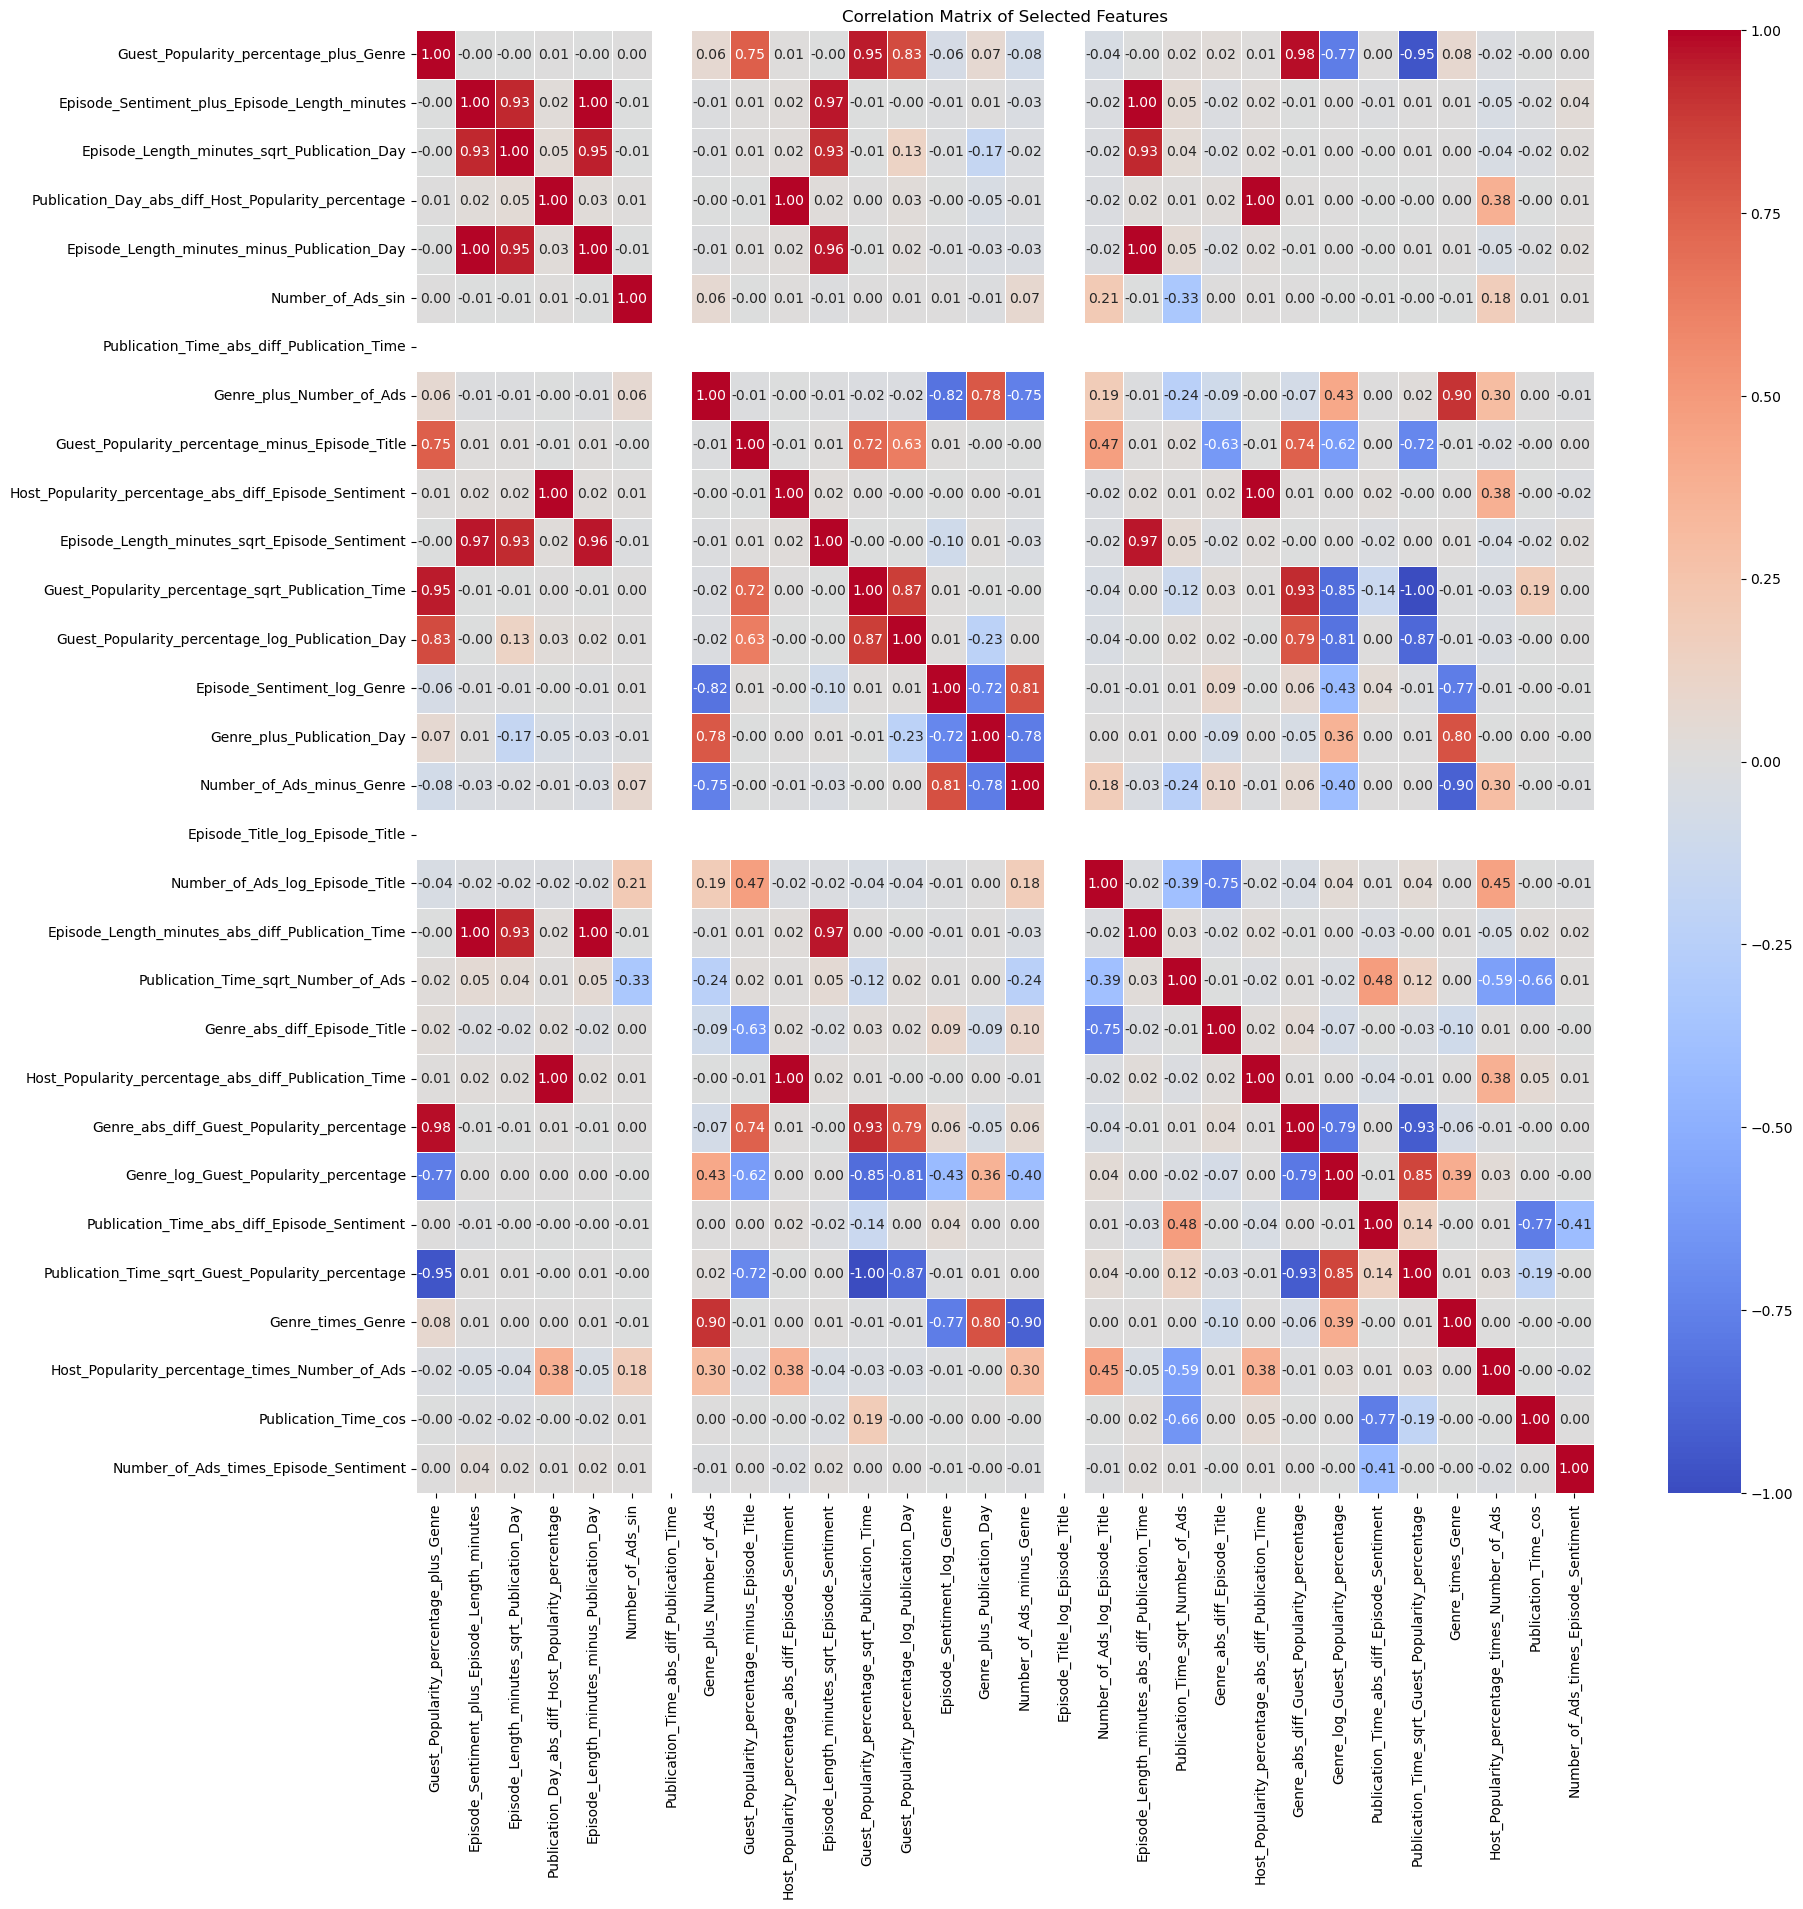

In [8]:
import random

cols = list(set(tr.columns) - set(['id', 'Podcast_Name', 'Listening_Time_minutes']))
random_cols= random.sample(cols, 30)


plt.figure(figsize=(19, 19))
sns.heatmap(tr[random_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Matrix of Selected Features")
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.341298 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 80432
[LightGBM] [Info] Number of data points in the train set: 495254, number of used features: 477
[LightGBM] [Info] Start training from score 45.711892


c:\Users\Admin\anaconda3\Lib\site-packages\lightgbm\callback.py:333: UserWarning: Early stopping is not available in dart mode
  _log_warning("Early stopping is not available in dart mode")


[50]	training's rmse: 11.6547	training's l1: 8.81894	valid_1's rmse: 11.6579	valid_1's l1: 8.83211
[100]	training's rmse: 11.6098	training's l1: 8.84439	valid_1's rmse: 11.6254	valid_1's l1: 8.86443
[150]	training's rmse: 11.235	training's l1: 8.59677	valid_1's rmse: 11.261	valid_1's l1: 8.62411
[200]	training's rmse: 10.5635	training's l1: 8.14919	valid_1's rmse: 10.613	valid_1's l1: 8.19311
[250]	training's rmse: 10.4253	training's l1: 8.05929	valid_1's rmse: 10.4923	valid_1's l1: 8.11396
[300]	training's rmse: 10.3525	training's l1: 8.0035	valid_1's rmse: 10.4372	valid_1's l1: 8.06854
[350]	training's rmse: 10.3159	training's l1: 7.98064	valid_1's rmse: 10.4126	valid_1's l1: 8.05277
[400]	training's rmse: 10.2082	training's l1: 7.89605	valid_1's rmse: 10.3311	valid_1's l1: 7.98377


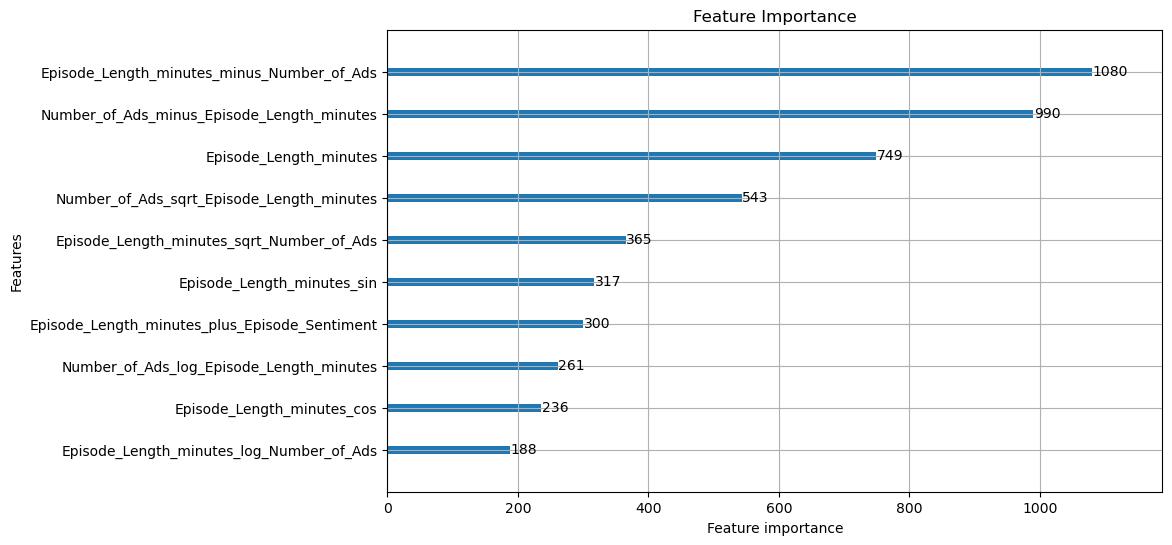

In [9]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#X_train, X_valid = get_split(tr, 0.3)
cols = list(set(tr.columns) - set(['id', 'Podcast_Name', 'Listening_Time_minutes']))

X_train, X_valid, y_train, y_valid = train_test_split(tr[cols],tr.Listening_Time_minutes, test_size=0.25, random_state=42)
X_test = tst[cols]

params = {
    'boosting_type': 'dart', 
    'objective': 'regression',
    'metric': ['rmse', 'mae'],
    'num_iterations': 400,
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': 7,
    'min_data_in_leaf': 20,
    'feature_fraction': 0.8,
    'drop_rate': 0.1,
    'skip_drop': 0.5,
    'max_drop': 50,
    'lambda_l1': 0.1,
    'lambda_l2': 0.1,
    'early_stopping_rounds': 50,
    'verbose': 1
}

train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)

# 5. Обучение модели
model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, valid_data],
    callbacks=[lgb.log_evaluation(period=50)]
)


# 6. Предсказание и оценка
y_pred = model.predict(X_test)

tst['Listening_Time_minutes'] = y_pred

# 7. Визуализация важности признаков
lgb.plot_importance(model, figsize=(10, 6), max_num_features=10)
plt.title("Feature Importance")
plt.show()

In [10]:
'''from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

cols = list(set(tr.columns) - set(['id', 'Podcast_Name', 'Listening_Time_minutes']))

X_train, X_valid, y_train, y_valid = train_test_split(tr[cols],tr.Listening_Time_minutes, test_size=0.25, random_state=42)
X_test = tst[cols]

estimators = [
    ('lgb', lgb.LGBMRegressor()),
    ('rf', RandomForestRegressor()),
    ('lr', LinearRegression())
]

stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=RidgeCV()
)
stacking_model.fit(X_train, y_train)
tst['Listening_Time_minutes'] = stacking_model.predict(X_test)'''

"from sklearn.ensemble import StackingRegressor\nfrom sklearn.linear_model import RidgeCV\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.linear_model import LinearRegression\n\ncols = list(set(tr.columns) - set(['id', 'Podcast_Name', 'Listening_Time_minutes']))\n\nX_train, X_valid, y_train, y_valid = train_test_split(tr[cols],tr.Listening_Time_minutes, test_size=0.25, random_state=42)\nX_test = tst[cols]\n\nestimators = [\n    ('lgb', lgb.LGBMRegressor()),\n    ('rf', RandomForestRegressor()),\n    ('lr', LinearRegression())\n]\n\nstacking_model = StackingRegressor(\n    estimators=estimators,\n    final_estimator=RidgeCV()\n)\nstacking_model.fit(X_train, y_train)\ntst['Listening_Time_minutes'] = stacking_model.predict(X_test)"

In [11]:
tst[['id', 'Listening_Time_minutes']]

,id,Listening_Time_minutes
0,750000,56.067704
1,750001,18.462843
2,750002,49.509791
3,750003,80.346814
4,750004,49.445696
...,...,...
249995,999995,11.511021
249996,999996,58.377490
249997,999997,6.932551
249998,999998,73.835197


In [12]:
tst[['id', 'Listening_Time_minutes']].to_csv('res.csv', index=False)